--- LEYENDO DATOS DE fractal_data.csv ---
Raíces detectadas: 3


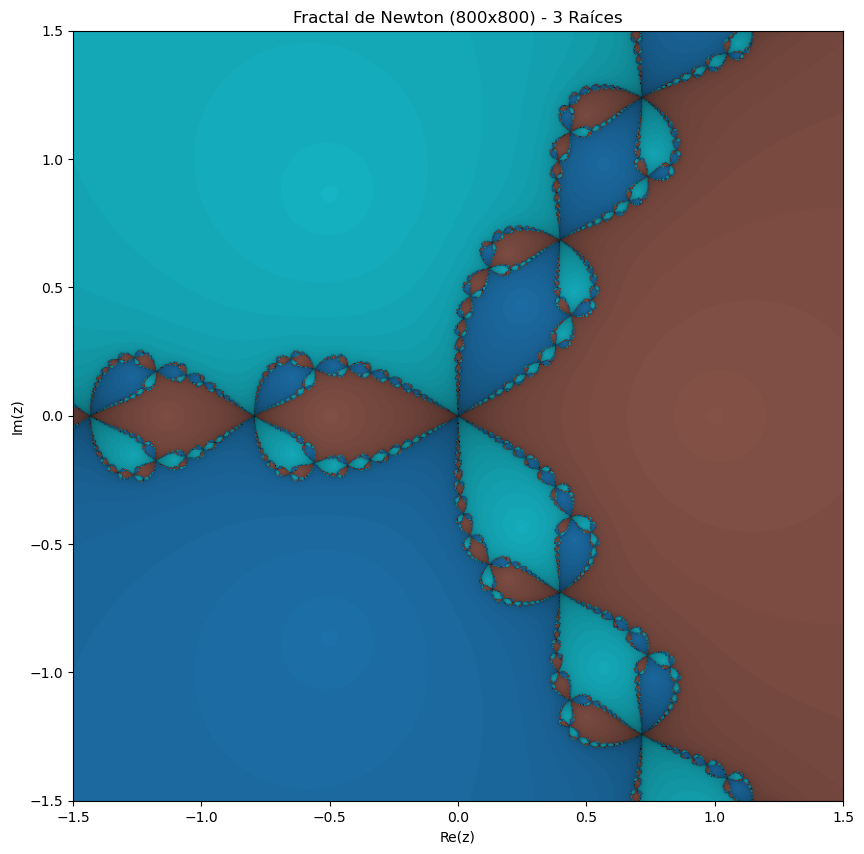

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

FILENAME = "fractal_data.csv"

def main():
    print(f"--- LEYENDO DATOS DE {FILENAME} ---")
    
    try:
        # Nota: La variable 'df' en la siguiente línea estaba mal nombrada; usamos 'datos'
        datos = pd.read_csv(FILENAME)
    except FileNotFoundError:
        print("Error: No se encontró 'fractal_data.csv'.")
        print("Asegúrate de ejecutar primero tu programa en C.")
        return

    # Corregimos el error de variable: usamos 'datos'
    num_pixels = len(datos) 
    resolution = int(math.sqrt(num_pixels)) 

    # Convertir los datos en matrices 2D, asegurando que sean enteros para la indexación
    # Usamos .astype(int) para obligar a NumPy a usar enteros
    roots = datos['root_idx'].values.astype(int).reshape((resolution, resolution))
    iters = datos['iterations'].values.reshape((resolution, resolution))

    # --- LÓGICA DINÁMICA DE COLOR (Corrección) ---
    
    # 1. Detectar cantidad de raíces
    # np.nanmax ignora los -1 de no-convergencia al buscar el máximo índice
    max_root_idx = int(np.nanmax(roots))
    
    if max_root_idx < 0:
        print("Advertencia: No se encontraron píxeles convergentes.")
        num_roots = 0
    else:
        num_roots = max_root_idx + 1 # Si el índice máximo es 4, hay 5 raíces (0,1,2,3,4)
    
    print(f"Raíces detectadas: {num_roots}")

    # 2. Generar paleta de colores dinámica
    if num_roots > 0:
        # Usamos 'hsv' para generar N colores distintos
        cmap = plt.get_cmap('tab10', num_roots)
        colors = cmap(np.arange(num_roots))[:, :3]
    else:
        colors = np.zeros((0, 3))

    # Crear imagen RGB vacía
    img = np.zeros((resolution, resolution, 3), dtype=float)

    mask_ok = roots >= 0  # Píxeles que sí convergieron
    
    # 3. Asignar colores (ahora 'colors' tiene el tamaño correcto)
    if num_roots > 0:
        # ¡Esta línea ya no dará IndexError porque roots[mask_ok] solo tendrá índices válidos!
        img[mask_ok] = colors[roots[mask_ok]] 

    # Normalizamos las iteraciones de 0 a 1 para ajustar el brillo
    max_iter = iters.max() if iters.max() > 0 else 1
    
    brightness = 1.0 - (iters / max_iter) * 0.8
    brightness = np.clip(brightness, 0, 1)

    # Multiplicamos el color base por el brillo en los 3 canales
    for c in range(3):
        img[..., c] *= brightness

    # 8. Mostrar gráfico
    plt.figure(figsize=(10, 10))
    plt.imshow(img, origin='lower', extent=[-1.5, 1.5, -1.5, 1.5])
    
    plt.title(f"Fractal de Newton ({resolution}x{resolution}) - {num_roots} Raíces")
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    
    plt.show()

if __name__ == "__main__":
    main()